<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/boxplot_formatting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
path = '/content/drive/MyDrive/Coding Dojo/04 Week 4: Explanatory Viz/athleteEventsNoPersonal.csv'
df = pd.read_csv(path)
df.head()

,ID,Age,Height,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,21.0,185.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
1,5,21.0,185.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
2,5,25.0,185.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
3,5,25.0,185.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
4,5,27.0,185.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


In [40]:
height_country_year = pd.DataFrame(df.groupby(['NOC', 'Year', 'ID'])['Height'].mean())
height_country_year

Height
NOC Year ID           
AFG 1936 1076      NaN
         5841      NaN
    1948 53317     NaN
         74404     NaN
         87371     NaN
...                ...
ZIM 2016 43912   181.0
         54198   163.0
         56724   171.0
         73763   159.0
         85834   182.0

[28189 rows x 1 columns]

In [41]:
temp = height_country_year.reset_index().groupby(['NOC', 'Year'])['Height'].apply(list)
temp = temp.reset_index()
temp

,NOC,Year,Height
0,AFG,1936,"[nan, nan]"
1,AFG,1948,"[nan, nan, nan, nan]"
2,AFG,1956,"[nan, nan]"
3,AFG,1960,[170.0]
4,AFG,1964,"[nan, 160.0]"
...,...,...,...
2535,ZIM,2000,"[176.0, 169.0, 178.0]"
2536,ZIM,2004,"[176.0, 168.0, 182.0, 178.0, 190.0]"
2537,ZIM,2008,"[173.0, 176.0]"
2538,ZIM,2012,[176.0]


In [42]:
nan_filter = temp.loc[:, 'Height'].apply(lambda x: np.logical_not(np.isnan(x).any()))
us_filter = temp['NOC'] == 'USA'
nan_filter & us_filter

0       False
1       False
2       False
3       False
4       False
        ...  
2535    False
2536    False
2537    False
2538    False
2539    False
Length: 2540, dtype: bool

In [43]:
year_height = temp.loc[nan_filter & us_filter, :]
year_height

,NOC,Year,Height
2431,USA,1964,"[163.0, 186.0, 185.0, 157.0, 168.0, 185.0, 175..."
2432,USA,1968,"[198.0, 185.0, 157.0, 188.0, 183.0, 191.0, 180..."
2435,USA,1980,"[186.0, 185.0, 175.0, 180.0, 193.0, 168.0, 170..."
2438,USA,1992,"[188.0, 170.0, 180.0, 173.0, 173.0, 183.0, 176..."
2441,USA,1998,"[178.0, 170.0, 188.0, 180.0, 183.0, 183.0, 185..."
2442,USA,2000,"[202.0, 172.0, 186.0, 164.0, 173.0, 190.0, 183..."
2443,USA,2002,"[178.0, 170.0, 185.0, 175.0, 183.0, 180.0, 167..."
2444,USA,2004,"[172.0, 170.0, 193.0, 180.0, 173.0, 193.0, 203..."
2445,USA,2006,"[178.0, 185.0, 180.0, 188.0, 180.0, 165.0, 180..."
2446,USA,2008,"[163.0, 170.0, 172.0, 193.0, 183.0, 173.0, 203..."


In [44]:
year_height['Year'].values
year_height['Height'].values[0]

[163.0,
 186.0,
 185.0,
 157.0,
 168.0,
 185.0,
 175.0,
 175.0,
 196.0,
 168.0,
 191.0,
 196.0,
 180.0,
 156.0,
 180.0,
 186.0,
 183.0,
 170.0,
 191.0,
 178.0,
 166.0,
 193.0,
 187.0,
 191.0,
 160.0,
 183.0,
 175.0,
 190.0,
 171.0,
 175.0,
 180.0,
 175.0,
 180.0,
 175.0,
 178.0,
 175.0,
 165.0,
 173.0,
 180.0,
 196.0,
 200.0,
 180.0,
 180.0,
 188.0,
 167.0,
 169.0,
 166.0,
 188.0,
 177.0,
 161.0,
 170.0,
 180.0,
 161.0,
 183.0,
 189.0,
 175.0]

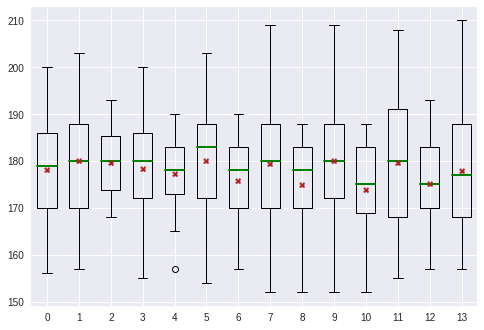

In [45]:
plt.style.use('seaborn')
index_list = []
for index, heights in enumerate(year_height['Height'].values):
  plt.boxplot(year_height['Height'].values[index],
              positions = [index],
              widths = 0.6,
              medianprops = dict(linestyle='-', linewidth = 2, color = 'green'),
              showmeans = True,
              meanprops = dict(marker = 'X', markeredgecolor = 'black', markerfacecolor='firebrick'))